# Results Visualization 
This file contains visualization of results obtained by running models_training.ipynb <br>
The produced figures show the same information as provided in the assignment sheet. 

In [184]:

from experiments.evaluation_result_container import EvaluationResultContainer
from visualization_utils import mk_bar_plot, mk_bar_plt_omit_empty
from experiments.evaluation_statistics import aggregate_by_exp_type
from experiments.metric import MetricTemplate,Flags, Metric
import matplotlib.pyplot as plt
from experiments.experiment_type import ExperimentType
import numpy as np

# Experiment 1

In [185]:
E1 = EvaluationResultContainer.from_json("saved_data\eval_results\E_1\E1.json")
E1

Experiment Results Container:
Experiment: E_1_1_rep_1_epoch_5 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_10 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_15 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_20 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_25 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_30 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_35 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_40 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_45 Results, Type: E_1_1
Experiment: E_1_1_rep_1_epoch_50 Results, Type: E_1_1
Experiment: E_1_2_16_rep_1_epoch_5 Results, Type: E_1_2_16
Experiment: E_1_2_16_rep_1_epoch_10 Results, Type: E_1_2_16
Experiment: E_1_2_16_rep_1_epoch_15 Results, Type: E_1_2_16
Experiment: E_1_2_16_rep_1_epoch_20 Results, Type: E_1_2_16
Experiment: E_1_2_16_rep_1_epoch_25 Results, Type: E_1_2_16
Experiment: E_1_2_16_rep_1_epoch_30 Results, Type: E_1_2_16
Experiment: E_1_2_16_rep_1_epoch_35 Results, Type: E_1_2_16
Experiment: 

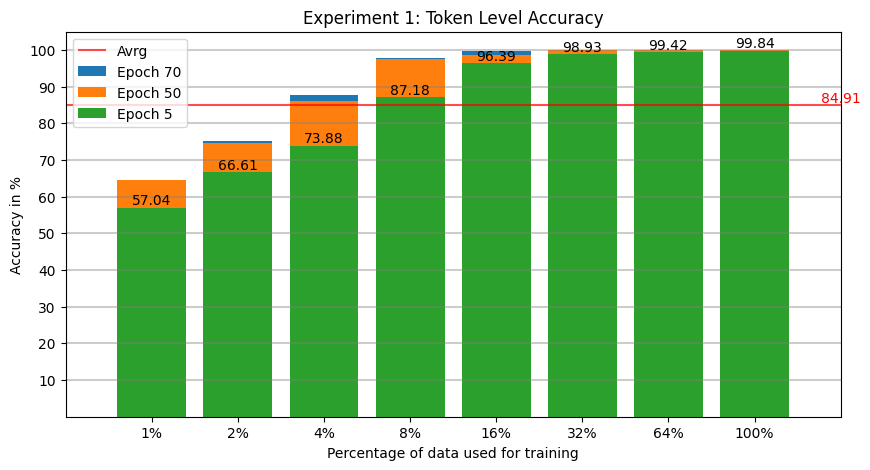

In [186]:
#TL ACC AVRG NO_ORACLE
acc_tl_avrg = MetricTemplate(flags=[
    Flags.LevelFlags.TL,
    Flags.MetricFlags.ACC,
    Flags.DistrFlags.Avrg,
    Flags.PredictionFlags.NO_ORACLE,
])


fig2, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title("Experiment 1: Token Level Accuracy")
ax.set_ylabel("Accuracy in %")
ax.set_xlabel("Percentage of data used for training")
x_lbls = ['1%','2%','4%','8%','16%','32%','64%','100%']
# change this to choose epochs to show
epochs_to_show = [70,50,5]

for epoch_num in epochs_to_show:
    epoch_data = E1.filter_by_exp_name(r'.+'+str(epoch_num))
    # avrg over repetitions
    epoch_data = aggregate_by_exp_type(epoch_data)
    #put E_1_1 to the end
    epoch_data.append_results(epoch_data.pop(0))

    ms:list[Metric] = (epoch_data*100).get_data(acc_tl_avrg)
    if epoch_num != epochs_to_show[-1]:
        mk_bar_plot(ax,ms,
                x_lbls=x_lbls,
                coords_txt=False,
                h_lines=False,
                add_avrg_line=False,
                bar_kwrgs={"label": "Epoch "+str(epoch_num)}
                )
    else:
        mk_bar_plot(ax,ms,x_lbls=x_lbls,
                    bar_kwrgs={
                        #"alpha": 0.25,
                        "label": "Epoch "+str(epoch_num)})

ax.legend()


# Experiment 2

In [187]:
E2 = EvaluationResultContainer.from_json("saved_data/eval_results/E_2/E2.json") 

### Token Level No oracle

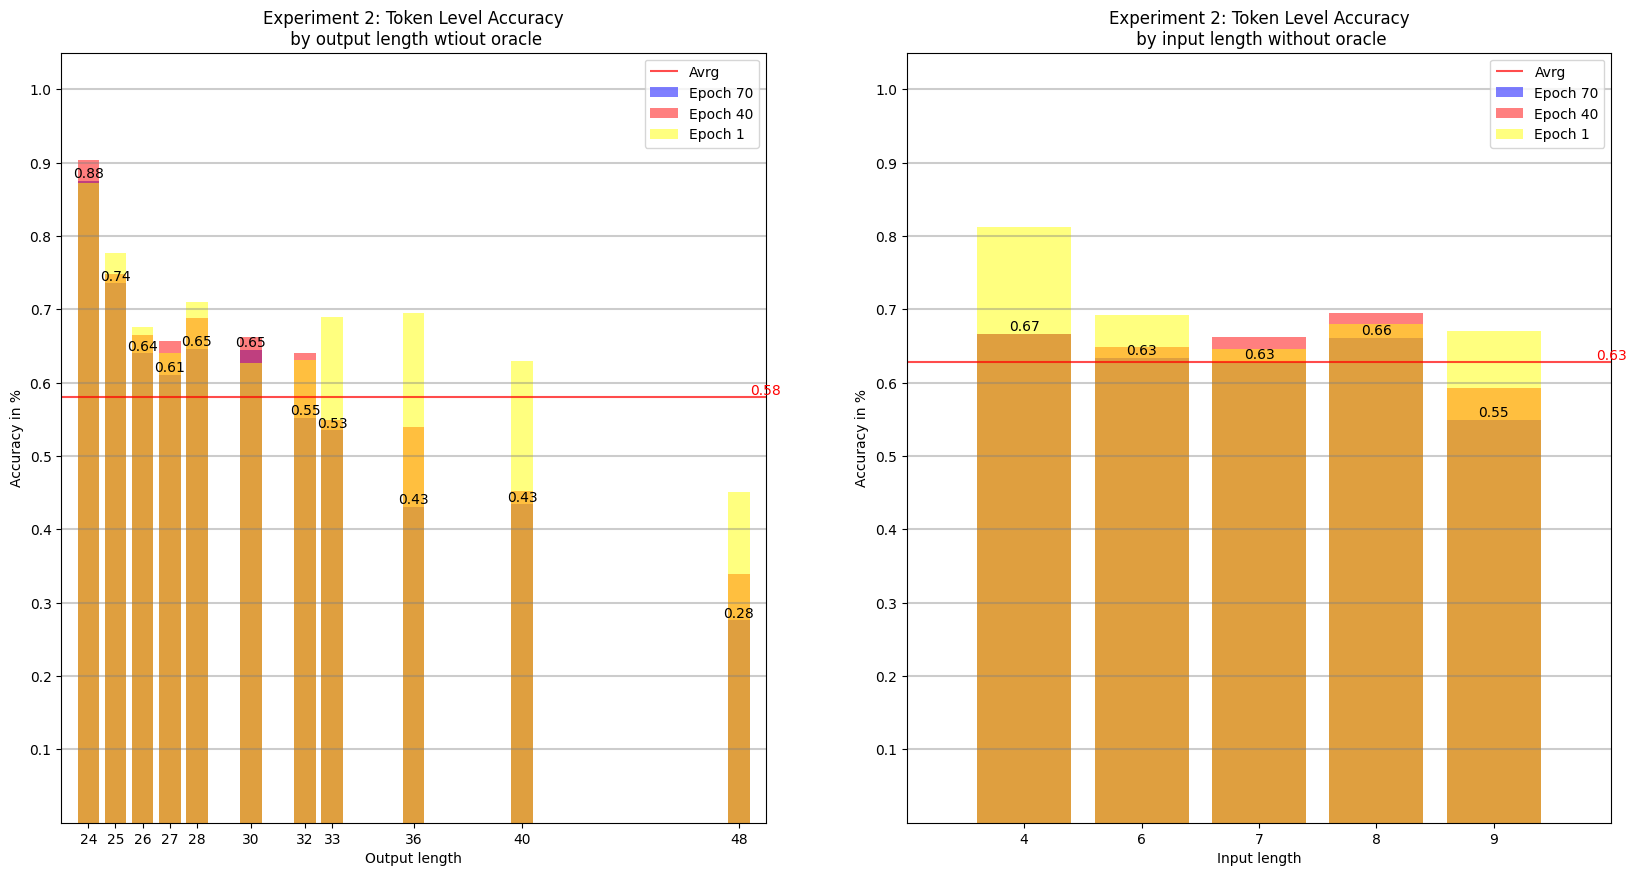

In [188]:
fig1, axs2_1 = plt.subplots(1, 2, figsize=(20, 10))
axs2_1[0].set_title("Experiment 2: Token Level Accuracy\n by output length wtiout oracle")
axs2_1[0].set_ylabel("Accuracy in %")
axs2_1[0].set_xlabel("Output length")

axs2_1[1].set_title("Experiment 2: Token Level Accuracy\n by input length without oracle")
axs2_1[1].set_ylabel("Accuracy in %")
axs2_1[1].set_xlabel("Input length")



# ACC TL NO ORACLE OUTLEN
acc_tl_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])

# ACC TL NO ORACLE INLEN
acc_tl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])

# TOTAL TL NO ORACLE INLEN
# used for removing empty bars in plots
tot_tl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.NO_ORACLE,
        ])

# change this to choose epochs to show
epochs_to_show = [70,40,1]
colors = ["blue","red","yellow"]

for epoch_num,color in zip(epochs_to_show,colors):
    #E2 = aggregate_by_exp_type(E2)
    epoch_data = E2.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_inlen:Metric = epoch_data.get_data(acc_tl_inlen)[0]
    epoch_data_outlen:Metric = epoch_data.get_data(acc_tl_outlen)[0]
    alpha = 0.5
    if epoch_num != epochs_to_show[0]:
        # lowest epoch
        if epoch_num == epochs_to_show[-1]:
            alpha = 0.5

        mk_bar_plot(axs2_1[0],data=epoch_data_outlen, 
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        mk_bar_plt_omit_empty(axs2_1[1],
                    data_metric=epoch_data_inlen, 
                    total_metric = epoch_data.get_data(tot_tl_inlen)[0],
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        
        
    else:
        # highest epoch
        mk_bar_plot(axs2_1[0],data=epoch_data_outlen, 
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "color": color,
                        "alpha": alpha,
                        })
        # highest epoch
        mk_bar_plt_omit_empty(axs2_1[1],
                            data_metric=epoch_data_inlen, 
                            total_metric = epoch_data.get_data(tot_tl_inlen)[0],
                            cut_trailing_zeros=True, 
                            omit_zero_lbls=True,
                            bar_kwrgs={
                                "label": "Epoch "+str(epoch_num),
                                "color": color,
                                "alpha": alpha

                        })

axs2_1[0].legend()
axs2_1[1].legend()



### Token Level With Oracle

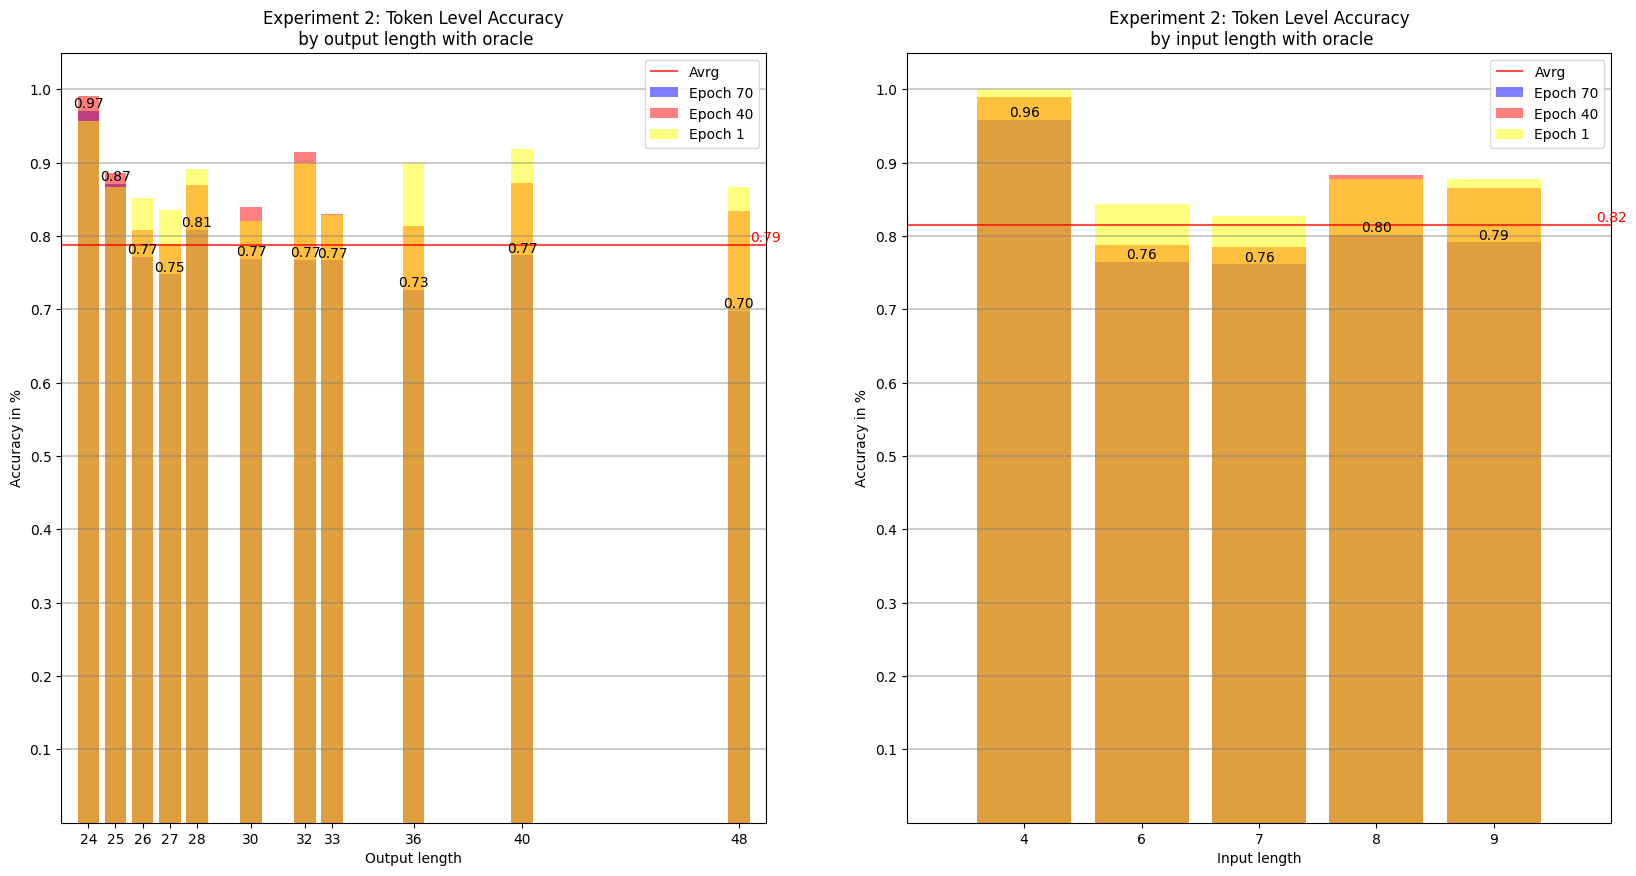

In [189]:

fig2, axs2_2 = plt.subplots(1, 2, figsize=(20, 10))
axs2_2[0].set_title("Experiment 2: Token Level Accuracy\n by output length with oracle")
axs2_2[0].set_ylabel("Accuracy in %")
axs2_2[0].set_xlabel("Output length")
axs2_2[1].set_title("Experiment 2: Token Level Accuracy\n by input length with oracle")
axs2_2[1].set_ylabel("Accuracy in %")
axs2_2[1].set_xlabel("Input length")

# ACC TL ORACLE OUTLEN
acc_tl_orac_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.ORACLE,
        ])

# ACC TL ORACLE INLEN
acc_tl_orac_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

# TOTAL TL ORACLE INLEN
# used for removing empty bars in plots
tot_tl_orac_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.TL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])



# change this to choose epochs to show
epochs_to_show = [70,40,1]
colors = ["blue","red","yellow"]

for epoch_num,color in zip(epochs_to_show,colors):
    #E2 = aggregate_by_exp_type(E2)
    epoch_data = E2.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_inlen:Metric = epoch_data.get_data(acc_tl_orac_inlen)[0]
    epoch_data_outlen:Metric = epoch_data.get_data(acc_tl_orac_outlen)[0]
    alpha = 0.5
    if epoch_num != epochs_to_show[0]:
        # lowest epoch
        if epoch_num == epochs_to_show[-1]:
            alpha = 0.5

        mk_bar_plot(axs2_2[0],data=epoch_data_outlen, 
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        mk_bar_plt_omit_empty(axs2_2[1],
                    data_metric=epoch_data_inlen, 
                    total_metric = epoch_data.get_data(tot_tl_orac_inlen)[0],
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        
        
    else:
        # highest epoch
        mk_bar_plot(axs2_2[0],data=epoch_data_outlen, 
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "color": color,
                        "alpha": alpha,
                        })
        # highest epoch
        mk_bar_plt_omit_empty(axs2_2[1],
                            data_metric=epoch_data_inlen, 
                            total_metric = epoch_data.get_data(tot_tl_orac_inlen)[0],
                            cut_trailing_zeros=True, 
                            omit_zero_lbls=True,
                            bar_kwrgs={
                                "label": "Epoch "+str(epoch_num),
                                "color": color,
                                "alpha": alpha

                        })

axs2_2[0].legend()
axs2_2[1].legend()





### Sequence Level With Oracle

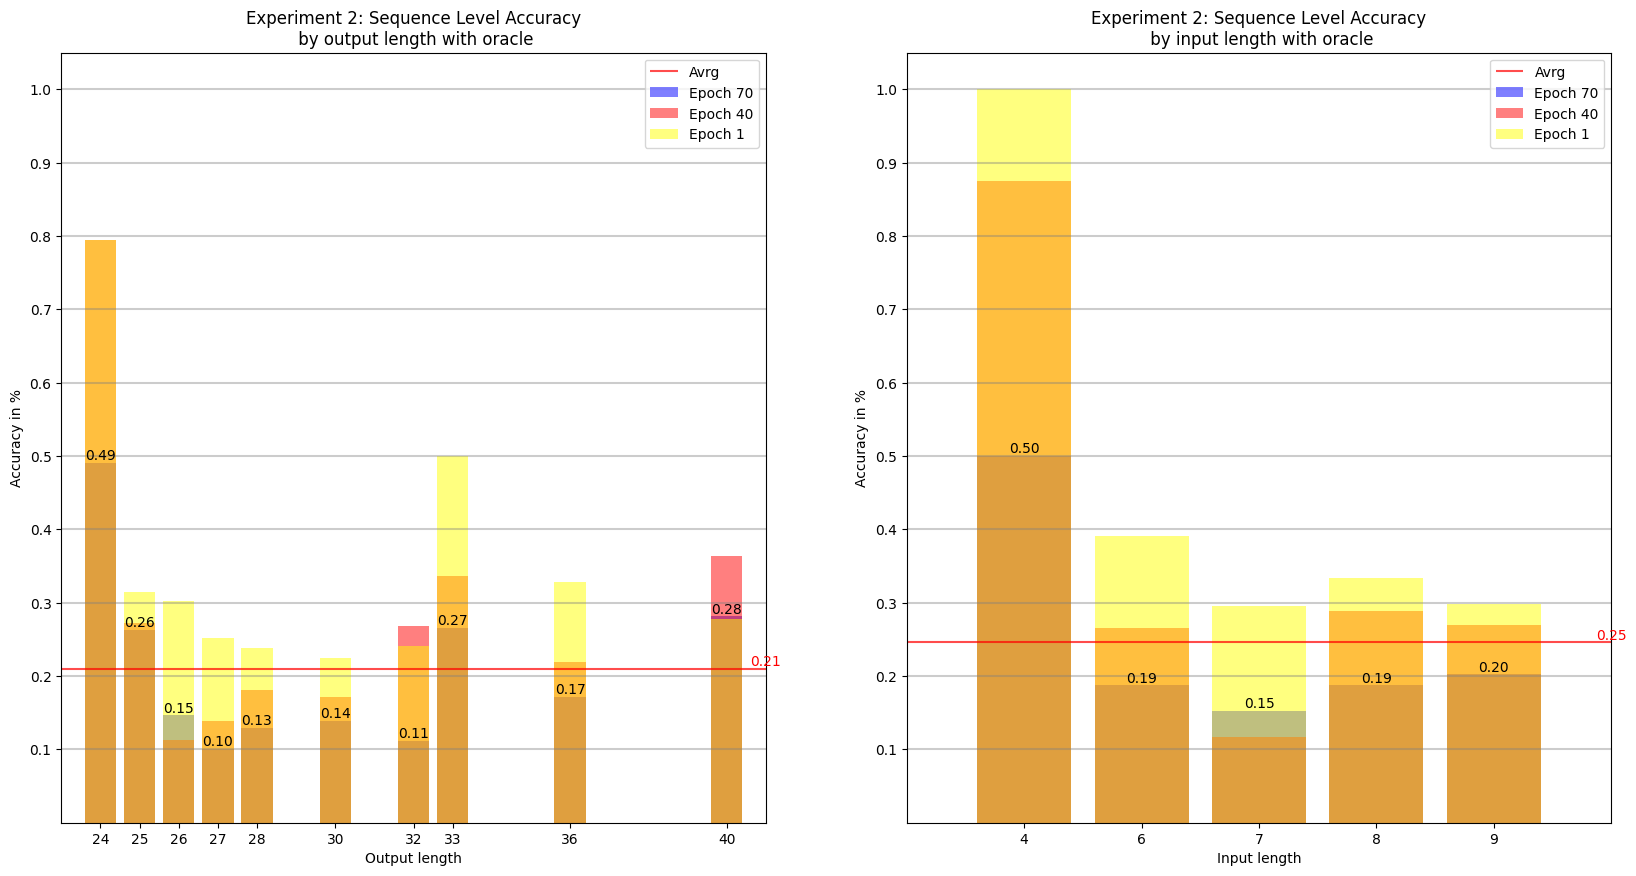

In [190]:
fig3, axs2_3 = plt.subplots(1, 2, figsize=(20, 10))
axs2_3[0].set_title("Experiment 2: Sequence Level Accuracy\n by output length with oracle")
axs2_3[0].set_ylabel("Accuracy in %")
axs2_3[0].set_xlabel("Output length")
axs2_3[1].set_title("Experiment 2: Sequence Level Accuracy\n by input length with oracle")
axs2_3[1].set_ylabel("Accuracy in %")
axs2_3[1].set_xlabel("Input length")

# ACC SL ORACLE OUTLEN
acc_sl_orac_outlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.OutLen,
        Flags.PredictionFlags.ORACLE,
        ])

# ACC SL ORACLE INLEN
acc_sl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.ACC,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])

# TOTAL SL ORACLE INLEN
# used for removing empty bars in plots
tot_sl_inlen = MetricTemplate(
    flags=[
        Flags.LevelFlags.SL,
        Flags.MetricFlags.TOTAL,
        Flags.DistrFlags.InLen,
        Flags.PredictionFlags.ORACLE,
        ])


# data:Metric = (E2*100).get_data(acc_sl_orac_outlen)[0]
# mk_bar_plot(axs3[0],data=data, cut_trailing_zeros=True, omit_zero_lbls=True)


# data:Metric = (E2*100).get_data(acc_sl_inlen)[0]
# total:Metric = E2.get_data(tot_sl_inlen)[0]
# mk_bar_plt_omit_empty(axs3[1],data_metric=data,total_metric=total, cut_trailing_zeros=True)


# change this to choose epochs to show
epochs_to_show = [70,40,1]
colors = ["blue","red","yellow"]

for epoch_num,color in zip(epochs_to_show,colors):
    #E2 = aggregate_by_exp_type(E2)
    epoch_data = E2.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_inlen:Metric = epoch_data.get_data(acc_sl_inlen)[0]
    epoch_data_outlen:Metric = epoch_data.get_data(acc_sl_orac_outlen)[0]
    alpha = 0.5
    if epoch_num != epochs_to_show[0]:
        # lowest epoch
        if epoch_num == epochs_to_show[-1]:
            alpha = 0.5

        mk_bar_plot(axs2_3[0],data=epoch_data_outlen, 
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        mk_bar_plt_omit_empty(axs2_3[1],
                    data_metric=epoch_data_inlen, 
                    total_metric = epoch_data.get_data(tot_sl_inlen)[0],
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        
        
    else:
        # highest epoch
        mk_bar_plot(axs2_3[0],data=epoch_data_outlen, 
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "color": color,
                        "alpha": alpha,
                        })
        # highest epoch
        mk_bar_plt_omit_empty(axs2_3[1],
                            data_metric=epoch_data_inlen, 
                            total_metric = epoch_data.get_data(tot_sl_inlen)[0],
                            cut_trailing_zeros=True, 
                            omit_zero_lbls=True,
                            bar_kwrgs={
                                "label": "Epoch "+str(epoch_num),
                                "color": color,
                                "alpha": alpha

                        })

axs2_3[0].legend()
axs2_3[1].legend()


### Experiment 3


In [191]:
E3_3 = EvaluationResultContainer.from_json("saved_data/eval_results/E_3/E3_3.json")
E3_2 = EvaluationResultContainer.from_json("saved_data/eval_results/E_3/E3_2.json")
E3_1 = EvaluationResultContainer.from_json("saved_data/eval_results/E_3/E3_1.json")

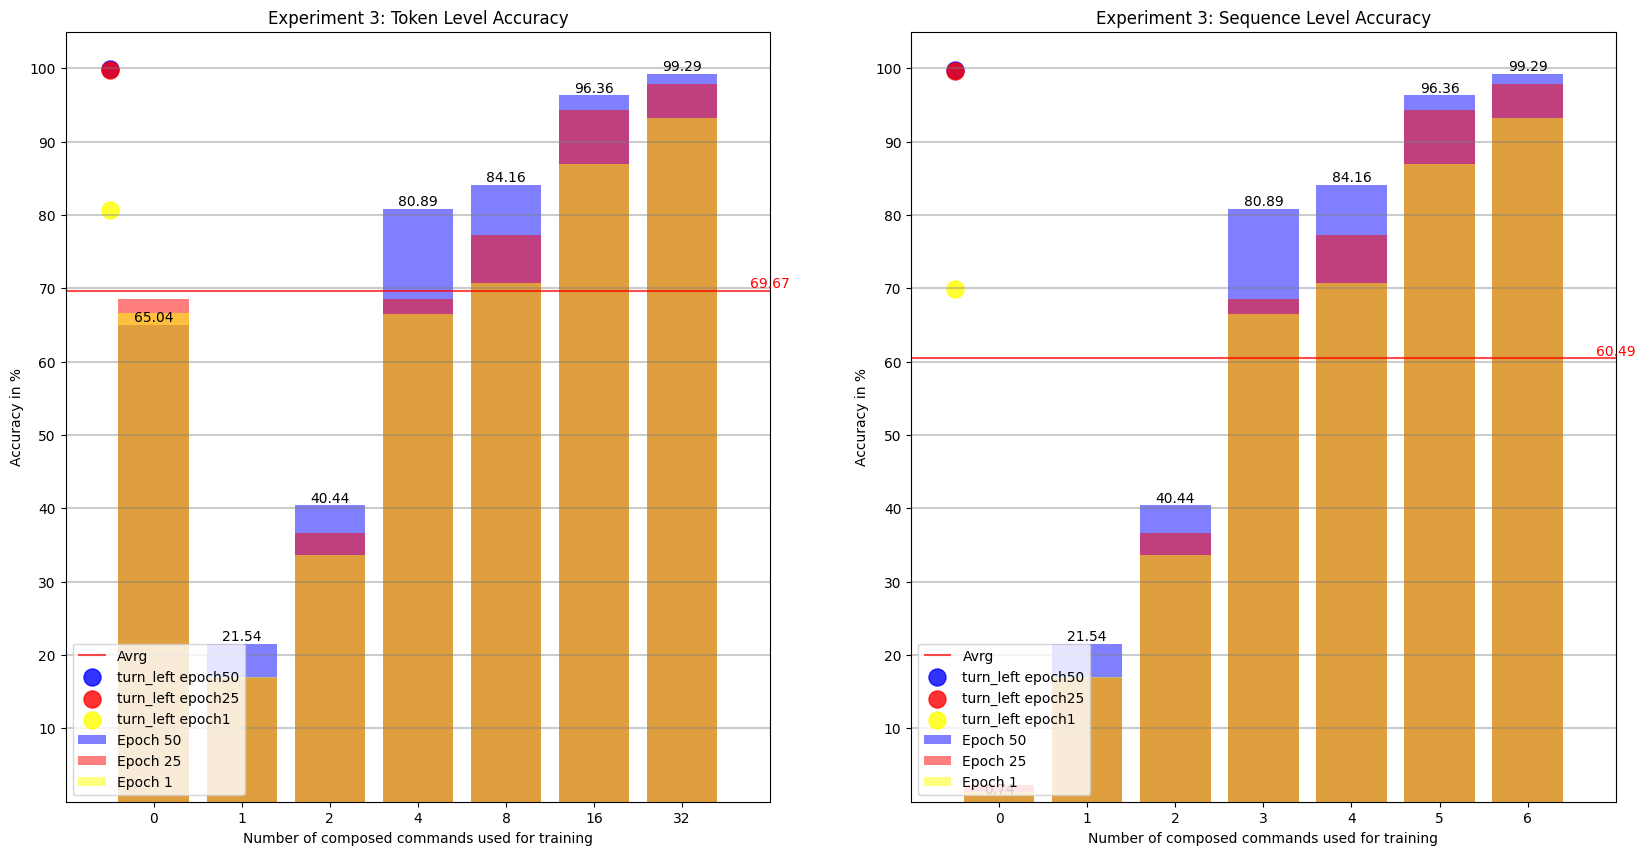

In [193]:
#SL ACC AVRG NO_ORACLE
acc_sl_avrg = MetricTemplate(flags=[
    Flags.LevelFlags.SL,
    Flags.MetricFlags.ACC,
    Flags.DistrFlags.Avrg,
    Flags.PredictionFlags.NO_ORACLE,
])

E3_23_x_lbls = ['0','1','2','4','8','16','32']

f3_3, axs3 = plt.subplots(1, 2, figsize=(20, 10))
axs3[0].set_title("Experiment 3: Token Level Accuracy")
axs3[0].set_ylabel("Accuracy in %")
axs3[0].set_xlabel("Number of composed commands used for training")
axs3[1].set_title("Experiment 3: Sequence Level Accuracy")
axs3[1].set_ylabel("Accuracy in %")
axs3[1].set_xlabel("Number of composed commands used for training")


import numpy as np

# change this to choose epochs to show
epochs_to_show = [50,25,1]
colors = ["blue","red","yellow"]

for epoch_num,color in zip(epochs_to_show,colors):
    epoch_data_3_1 = E3_1.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_3_2 = E3_2.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_3_3 = E3_3.filter_by_exp_name(r'.+'+str(epoch_num))
    epoch_data_3_2 = np.mean(epoch_data_3_2, axis=0)
    epoch_data_3_3 = aggregate_by_exp_type(epoch_data_3_3)
    epoch_data_3_3.sort_by_exp_types()
    # split into sublists of 5 repetitions of each sub experiment
    sub_exprs:list[EvaluationResultContainer]= [epoch_data_3_3[i*5:(i+1)*5] for i in range(len(epoch_data_3_3)//5)]
    # avrg over repetitions
    epoch_data_3_3_avrg = EvaluationResultContainer(np.mean(sub_exprs, axis=1))*100
    epoch_data_3_2 = EvaluationResultContainer([epoch_data_3_2*100])
    epoch_data_3_2_tl = epoch_data_3_2.get_data(acc_tl_avrg)
    epoch_data_3_3_tl = epoch_data_3_3_avrg.get_data(acc_sl_avrg)
    epoch_data_3_23_tl = epoch_data_3_2_tl + epoch_data_3_3_tl

    epoch_data_3_2_sl = epoch_data_3_2.get_data(acc_sl_avrg)
    epoch_data_3_3_sl = epoch_data_3_3_avrg.get_data(acc_sl_avrg)
    epoch_data_3_23_sl = epoch_data_3_2_sl + epoch_data_3_3_sl

    turn_left_tl = epoch_data_3_1.get_data(acc_tl_avrg)[0].val*100
    turn_left_sl = epoch_data_3_1.get_data(acc_sl_avrg)[0].val*100

    alpha = 0.5
    if epoch_num != epochs_to_show[0]:
        # lowest epoch
        if epoch_num == epochs_to_show[-1]:
            alpha = 0.5
        mk_bar_plot(axs3[0],
                    data=epoch_data_3_23_tl, 
                    x_lbls=E3_23_x_lbls,
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        mk_bar_plot(axs3[1],data=epoch_data_3_23_sl, 
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    coords_txt=False,
                    h_lines=False,
                    add_avrg_line=False,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "alpha": alpha,
                        "color": color
                        })
        axs3[0].scatter(x = -0.5, y = turn_left_tl, label=("turn_left epoch"+str(epoch_num)), color=color, marker='o',s=150,alpha=0.8)
        axs3[1].scatter(x = -0.5, y = turn_left_sl, label=("turn_left epoch"+str(epoch_num)), color=color, marker='o',s=150,alpha=0.8)
    else:
        # highest epoch
        mk_bar_plot(axs3[0],
                    data=epoch_data_3_23_tl, 
                    x_lbls=E3_23_x_lbls,
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "color": color,
                        "alpha": alpha,
                        })
        # highest epoch
        mk_bar_plot(axs3[1],
                    data=epoch_data_3_23_sl, 
                    x_lbls=E3_23_x_lbls,
                    cut_trailing_zeros=True, 
                    omit_zero_lbls=True,
                    bar_kwrgs={
                        "label": "Epoch "+str(epoch_num),
                        "color": color,
                        "alpha": alpha,
                        })
        axs3[0].scatter(x = -0.5, y = turn_left_tl, label=("turn_left epoch"+str(epoch_num)), color=color, marker='o',s=150,alpha=0.8)
        axs3[1].scatter(x = -0.5, y = turn_left_sl, label=("turn_left epoch"+str(epoch_num)), color=color, marker='o',s=150,alpha=0.8)



axs3[0].legend()
axs3[1].legend()
axs3[0].legend(loc='lower left')
axs3[1].legend(loc='lower left')






